In [21]:
# Automatically reloads modules before executing code.
# This ensures that any changes made to imported Python files (e.g. .py modules) 
# are reflected in the notebook without needing to restart the kernel.

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import os
import sys
import time
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from samplers.rejection_sampler import *

In [23]:
def gaussian_pdf(x: np.ndarray, mean: float = 0.0, std: float = 1.0) -> np.ndarray:
    """
    Compute the probability density function (PDF) of a Gaussian (normal) distribution.

    Parameters
    ----------
    x : np.ndarray
        Points at which to evaluate the PDF.
    mean : float, optional
        Mean (μ) of the normal distribution. Default is 0.0.
    std : float, optional
        Standard deviation (σ) of the normal distribution. Must be positive. Default is 1.0.

    Returns
    -------
    np.ndarray
        The PDF values of the Gaussian distribution evaluated at each point in `x`.

    Notes
    -----
    This implementation is vectorized using NumPy for efficiency.
    The formula used is:
        f(x) = (1 / (σ√(2π))) * exp(- (x - μ)² / (2σ²))
    """
    coeff = 1 / (std * np.sqrt(2 * np.pi))
    exponent = -((x - mean) ** 2) / (2 * std ** 2)
    return coeff * np.exp(exponent)

In [25]:
help(rejection_sampling_uniform)

Help on function rejection_sampling_uniform in module samplers.rejection_sampler:

rejection_sampling_uniform(f, xmin, xmax, N, *args, **kwargs)
    Rejection sampling with a uniform proposal on [xmin, xmax].
    This algorithm is valid iff f(x) < M.
    If we encounter a value of f(x) exceeding the current estimate of M, we reset.

    Parameters
    ----------
    f : callable
        Target density function (proportional) defined on [xmin, xmax].
        Should accept a float or numpy array as first argument, followed by optional arguments.
    xmin : float
        Lower bound of the domain.
    xmax : float
        Upper bound of the domain.
    N : int
        Number of samples to generate.
    *args : tuple, optional
        Additional positional arguments to pass to the target function `f`.
    **kwargs : dict, optional
        Additional keyword arguments to pass to the target function `f`.

    Returns
    -------
    samples : np.ndarray
        Array of length `N` containing

In [47]:
samples, M = rejection_sampling_uniform(gaussian_pdf, -5, 5, 500000, 0, 1)

In [48]:
M

np.float64(0.3989422804000253)

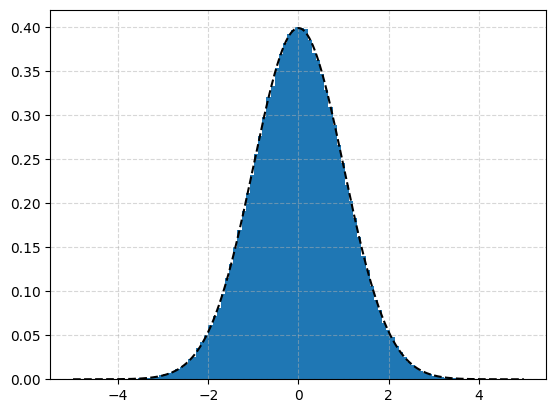

In [49]:
x = np.linspace(-5, 5, 10000)
pdf = gaussian_pdf(x, 0, 1)
plt.plot(x, pdf, color="black", ls="--")
plt.hist(samples, bins=100, density=True)
plt.grid(ls="--", alpha=0.5)
plt.show()

In [61]:
xmin, xmax = -2, 2
official_samples = np.random.normal(0, 1, 1000000)
rejection_samples, M = rejection_sampling_uniform(gaussian_pdf, xmin, xmax, 100000, 0, 1)

In [62]:
official_samples = official_samples[(official_samples < xmax) & (official_samples > xmin)]

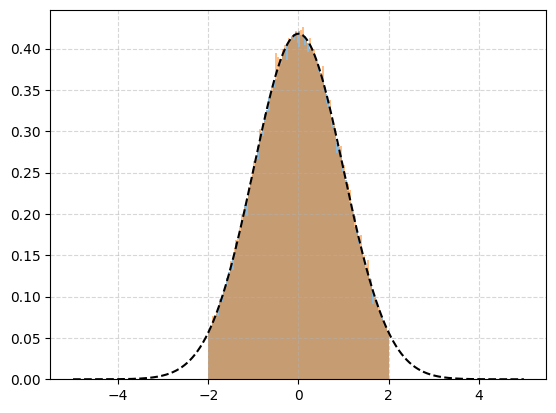

In [78]:
for sampl in [official_samples, rejection_samples]:
    plt.hist(sampl, bins=100, density=True, alpha=0.5)
plt.grid(ls="--", alpha=0.5)
plt.plot(x, pdf/(norm.cdf(2) - norm.cdf(-2)), color="black", ls="--")
plt.show()

La constante de normalisation est la masse totale (la probabilité) de la normale entre −2 et 2 :
a, b = (xmin - mu) / sigma, (xmax - mu) / sigma
#Masse totale sur l’intervalle tronqué
Z = norm.cdf(b) - norm.cdf(a)

Il faut que je fasse ça un peu plus propre avec des dictionnaires des arguments de la gaussienne pour pouvoir adapter la pdf que je trace facilement